# 課程目標:
了解反向傳播的原理與在神經網路推倒過程中的作用 <br />
# 範例重點:
(1)自定義神經網路架構 <br />
<br />
(2) 初始值設定<br />
<br />
(3) 使用範例

In [1]:
class mul_layer():
    def _init_(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x 
        self.y = y
        return x*y
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

In [2]:
#setting initial values
n_x = 2
price_y = 100
b_tax = 1.1

#build the network
mul_fruit_layer = mul_layer()
mul_tax_layer = mul_layer()

# 以購買水果為例:
付費總價格是根據水果價格, 稅金變動而受影響 <br />
<br />
水果價格是根據購買數量與單品價格而變動<br />
<br />
可以利用每一個cell (cell - 1: 水果價格; cell - 2: 付費總價格), 推導微分的結果

In [4]:
fruit_price = mul_fruit_layer.forward(n_x, price_y)
total_price = mul_tax_layer.forward(fruit_price, b_tax)

#backward
dtotal_price = 1
d_fruit_price, d_b_tax = mul_tax_layer.backward(dtotal_price)
d_price_y, d_n_x = mul_fruit_layer.backward(d_fruit_price)

In [5]:
#result
print("fruit price: %i"%fruit_price)
print("針對所有水果價格微分, 得到 TAX: %2f" %d_fruit_price)

fruit price: 200
針對所有水果價格微分, 得到 TAX: 1.100000


# BP 演算法訓練的神經網路
目標: 嘗試著用輸入去預測輸出, 了解權重的更新 <br />
<br />
考慮以上情形： 給定三列輸入，試著去預測對應的一列輸出。<br />
<br />
我們可以通過簡單測量輸入與輸出值的資料來解決這一問題。<br />
<br />
最左邊的一列輸入值和輸出值是完美匹配/完全相關的。<br />
<br />
反向傳播演算法便是通過這種方式來衡量資料間統計關係進而得到模型的。<br />
<br />
# 參數定義
X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。<br />
<br />
y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。<br />
<br />
l0 網路第 1 層，即網路輸入層。<br />
<br />
l1 網路第 2 層，常稱作隱藏層。<br />
<br />
syn0 第一層權值，突觸 0 ，連接 l0 層與 l1 層。<br />
<br />
逐元素相乘，故兩等長向量相乘等同於其對等元素分別相乘，結果為同等長度的向量。<br />
– 元素相減，故兩等長向量相減等同於其對等元素分別相減，結果為同等長度的向量。<br />
<br />
x.dot(y) 若 x 和 y 為向量，則進行點積操作；若均為矩陣，則進行矩陣相乘操作；若其中之一為矩陣，則進行向量與矩陣相乘操作。<br />

In [126]:
import numpy as np

def sigmoid(x, deriv = False):
    if deriv == True:
        return np.exp(-x) / (1 + np.exp(-x)) ** 2
    return 1 / (1 + np.exp(-x))

#input data
#3 input nodes, 4 training examples
x = np.array([  [0,0,1],
                     [0,1,1],
                     [1,0,1],
                     [1,1,1]  ])

#define output dataset
y = np.array([[0,0,1,1]]).T

np.random.seed(1)

#initialize weights randomly with mean 0
syn0 = 2 * np.random.random((3,1)) - 1
iteration = 0
syn0_history = [syn0]

# 神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [21]:
for iteration in range(10000):
    # forward propagation
    l0 = x # 4 * 3 array
    l1 = sigmoid(np.dot(l0, syn0)) # sigmoid( 4*3 dot 3 * 1 = 4 * 1 array), calculate the sigmoid output of l0 inputs with weighting
    
    
    # how much did we miss
    l1_error  = y - l1
    
    #multiply how much we missed by the
    #slope of the sigmoid at the values in l1
    
    l1_delta = l1_error * sigmoid(l1, True)
    
    #update weights
    syn0 += np.dot(l0.T,l1_delta)

    

print("output after training:")
print("\n")
print(l1)

output after training:


[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


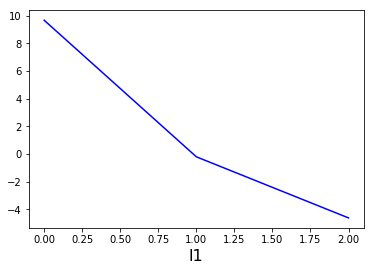

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(syn0_history[0], ms=3, lw=1.5, color = 'b')
plt.xlabel('l1', fontsize = 16)
plt.show()

In [23]:
syn0_history[0]

array([[ 9.67299303],
       [-0.2078435 ],
       [-4.62963669]])

# 作業目標:
通過建立多層的神經網路, 了解權值矩陣更新 <br />
# 作業重點:
3 層神經網路<br />
<br />
通過增加更多的中間層，以對更多關係的組合進行建模<br />
<br />
syn1 權值矩陣將隱層的組合輸出映射到最終結果，<br />
<br />
而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，<br />
<br />
以從輸入資料中更好地產生這些組合

In [130]:

x = np.array([  [0,0,1],
                     [0,1,1],
                     [1,0,1],
                     [1,1,1]  ])

y = np.array( [[0,0,1,1]]).T

iterations = 0
syn0 = 2 * np.random.random((3,2)) - 1
syn1 = 2 * np.random.random((2,1)) - 1


In [131]:
for iteration in range(10000):
    
    #Forward pass
    
    # np.dot(l0, syn0) = z (ex: w1x1+w2x2+w3x3 = z1[0], w4x1+w5x2+w6x3 = z1[1])
    # sigmoid(z1)  -> activation function
    # assume sigmoid(z) = a(z)
    # np.dot(a1,syn1) = z2 (ex: a(z1)*w7 + a(z2)*w8 = z2)
    # a(z2) = sigmoid(z2) = output
    l0 = x
    z1 = np.dot(l0, syn0)
    a1 = sigmoid(z1)
    z2 = np.dot(a1,syn1)
    a2 = sigmoid(z2)
    
    #l2_loss = dC/dy (C->cost function)
    l2_loss = y - a2
    #l2_delta = dC/dz2 =  dC/dy * dy/dz2 = dC/dy * da2/dz2 = dC/dy * dsigmoid(z2)
    l2_delta = l2_loss * sigmoid(z2,True)

    #l1_delta = dC/dz1 = dC/da1 * da1/dz1 = dC/da1 * dsigmoid(z1)
    #dC/da = l1_loss = dC/dz2 * dz2/da1 = l2_delta * syn1(weighting 1)
    
    l1_loss = np.dot(l2_delta,syn1.T)

    l1_delta = l1_loss *sigmoid(z1,True)
    
    #weighting 1 = weighting 1 - dC/dweighting 1 
   #dC/dweighting 1 = dC/dsyn1 = dC/dz2 * dz2/dsyn1 = l2_delta * a2
    
    syn1 += np.dot(a1.T, l2_delta)
    syn0 += np.dot(l0.T, l1_delta)
                   
    
print("Output After Training:")
print(a1)
print("\n\n")
print(a2)

Output After Training:
[[0.1815507  0.89214247]
 [0.16816358 0.91041467]
 [0.92511875 0.04263467]
 [0.91842942 0.05187628]]



[[0.00563846]
 [0.00458601]
 [0.99452722]
 [0.99392776]]
